# TP 4 : Graphisme

In [17]:
%matplotlib inline
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
init_printing()

# 1. Croissance de quelques fonctions

Afficher les courbes $y=x$, $y=x\cdot\log_2(x)$, $y=x^2$ sur un même graphique
- en utilisant `plot` de `sympy` 
- en utilisant `plot` de `matplotlib`

Faites varier l'intervalle du tracé en $x$ pour afficher les croisances relatives, en particulier pour de petites valeurs de l'intervalle $]0,4]$, par exemple.

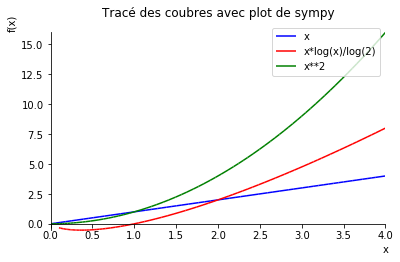

In [14]:
#avec plot de sympy, donc de manière symbolique
x=symbols('x')
y1=x
y2=x*log(x,2)
y3=x**2
p1=plot(y1,(x,0,4),show=False,line_color='b',legend=('$x$','x\cdot\log_{2}x$','$x^{2}'),title='Tracé des coubres avec plot de sympy')
p2=plot(y2,(x,0.1,4),show=False,line_color='r')  #x commence à 0.1 ici car le log n'est pas défini en 0
p3=plot(y3,(x,0,4),show=False,line_color='g')
p1.extend(p2); p1.extend(p3)    #pour tracer sur le même graphique
p1.show()

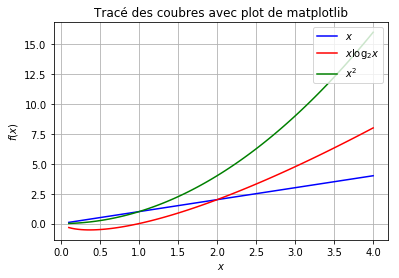

In [5]:
#avec plot de matplotlib, donc de manière numérique
x2=np.linspace(0.1,4,100)
y2_2=x2*np.log(x2)/np.log(2)
y3_3=x2**2
plt.plot(x2,x2,c='b')
plt.plot(x2,y2_2,c='r')
plt.plot(x2,y3_3,c='g')
plt.grid()   #afficher la grille
plt.title('Tracé des coubres avec plot de matplotlib')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(('$x$','$x\log_{2}x$','$x^{2}$'),loc='upper right')

On observe que ces courbes ont des points d'intersection. Sauriez-vous les retrouver formellement?

In [6]:
#Les points d'intersection se trouvent grâce à 'solve' qui permet de trouver les points lorsque les courbes sont égales
inters_y1_y2=solve(Eq(x,x*log(x)/log(2)))
inters_y1_y2

In [7]:
inters_y1_y3=solve(Eq(x,x**2))
inters_y1_y3

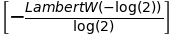

In [8]:
inters_y2_y3=solve(Eq(x**2,x*log(x,2)))
inters_y2_y3

Les points d'intersection entre les courbes trouvés sont cohérents avec ceux obtenus sur le graphique.
On a bien :
- $y = x$ qui coupe $y = x\log_{2}x$ en $x = 2$
- $y = x$ qui coupe $y = x^{2}$ en $x = 0$ et $x = 1$
- $y = x^{2}$ ne coupe pas $x\log_{2}x$. D'où la valeur $[−LambertW(−log(2)/log(2)]$

# 2. Tracé avec une équation polaire

Un point $M(x,y)$ dans le plan peut être caractérisé
- par ses coordonnées cartésiennes $(x,y)$
- par ses coordonnées polaires:
    - $\rho$: la norme du vecteur $\overrightarrow{OM}$
    -  $\theta$: l'angle entre l'axe des abcisses et le vecteur $\overrightarrow{OM}$
    
On peut définir une *équation polaire* d'une courbe comme le paramétrage de la courbe par l'angle $\theta$ qui définit $\rho$ comme une fonction de $\theta$.

**Exemple:** On définit la courbe du bifolium régulier par l'équation polaire $$\rho=a(sin\theta + sin 3\theta)$$

Elle est représentée ci-dessous pour la valeur de $a=8$:

On peut transformer les coordonnées polaires en coordonnées cartésiennes en posant $x=\rho\cos\theta$, $y=\rho\sin\theta$ et $\rho=\sqrt{x^2+y^2}$

1. Dessinez la courbe du bifolium régulier définie ci-dessus.
2. Dessinez une courbe à choisir dans l'[annuaire des courbes](https://www.mathcurve.com/courbes2d/courbes2d.shtml) si vous avez le temps

Attention, il y a un petit piège !

### 1.  Bifolium régulier

In [18]:
#on est en symbolique
a,t,y=symbols('a t y')
a=8
p=a*(sin(t)+sin(3*t))
x3=simplify(p*cos(t))
y3=simplify(p*sin(t))
x3,y3

Text(0,0.5,'$y(t)$')

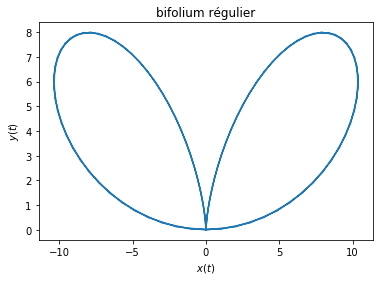

In [19]:
#on passe en numérique pour tracer la courbe
t=np.linspace(0,2*np.pi,100)
x4=8*np.sin(2*t) + 4*np.sin(4*t)
y4=-4*np.cos(4*t) + 4
plt.plot(x4,y4)
plt.title('bifolium régulier')
plt.xlabel('$x(t)$')
plt.ylabel('$y(t)$')

### 2.  Coeur de Raphaël Laporte

https://www.mathcurve.com/courbes2d/ornementales/ornementales.shtml

Paramétrisation cartésienne :
$x=cos^{3}t$   et   $y=cos t-cos^{4} t$

Equation cartésienne :
$x^{8}-x^{6}+27x^{4}-27x^{2}+12yx^{6}-12yx^{4}+42y^{2}x^{4}
+42y^{2}x^{2}+2y^{3}x^{4}+26y^{3}x^{2}+8y^{3}+12y^{4}x^{2}+12y^{4}+6y^{5}+y^{6}=0$

Text(0,0.5,'$y(t)$')

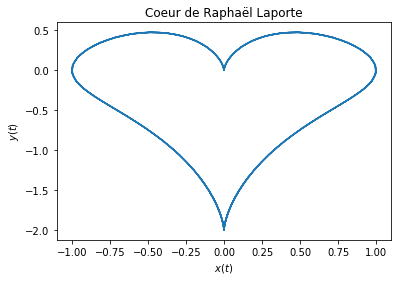

In [11]:
chaiqumwbecym=symbols('chaiqumwbecym')
chaiqumwbecym = np.linspace(-10, 10, 200)
xv = (np.sin(chaiqumwbecym))**3
yv = np.cos(chaiqumwbecym) - (np.cos(chaiqumwbecym))**4
plt.plot(xv, yv)
plt.title('Coeur de Raphaël Laporte')
plt.xlabel('$x(t)$')
plt.ylabel('$y(t)$')

# 3. Interpolation

Comme fait en cours essayez de perturber un peu les valeurs sur des cubiques pour retrouver le meilleur polynôme d'interpolation et affichez sur un même graphique le nuage des valeurs et la courbe d'interpolation.

   3             2
1 x - 0.0002216 x - 0.004961 x + 0.5634


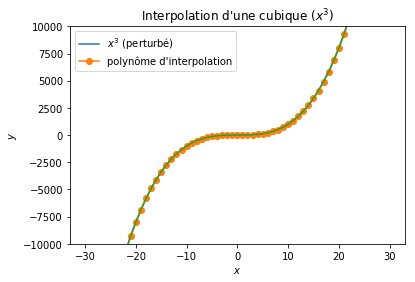

In [12]:
from scipy.interpolate import interp1d, lagrange
from random import random
from pylab import legend


x5=[i for i in range(-30,30)]
y5=[i**3+(random()) for i in range(-30,30)]   #construction d'une suite cubique de points légèrement modifiée par 0<ε<1
plt.plot(x5,y5)


g=np.polyfit(x5,y5,3)  #minimise l'erreur au carré des coefficients
pol=np.poly1d(g)       #création du polynôme qui s'approche au mieux de la courbe x^3 perturbée
xs=np.linspace(-30,30,200) 
ys=pol(xs) 


plt.ylim(-10000,10000)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x5,y5,marker='o')  #nuage de points
plt.plot(xs,ys)
legend(['$x^{3}$ (perturbé)','polynôme d\'interpolation'])
plt.title('Interpolation d\'une cubique ($x^{3}$)')
print(pol)


# 4. Graphique 3D

Reprenez les bijections de $N^2\rightarrow N$ et essayez de les afficher sur un même graphique 3D pour $0\leq x,y\leq 4$ et sous la forme de deux nuages de points de deux couleurs différentes.

Vous pourrez, pour ce faire, vous inspirer de l'exemple ci-dessous qu'on retrouve [sur le web](https://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/) et la [doc](https://matplotlib.org/tutorials/toolkits/mplot3d.html#the-mplot3d-toolkit)

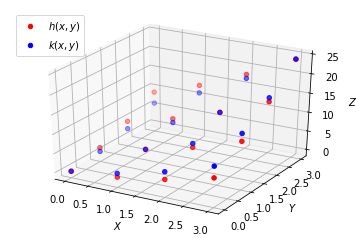

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()   # crée la figure
ax = fig.add_subplot(111, projection='3d') 
# dessus, on instancie la figure avec des axes 3D

def h(x,y):
    return y+(x+y)*(x+y+1)/2

def k(x,y):
    return (3*x+y+(x+y)**2)/2
    
x,y,z1,z2=[],[],[],[]

#création de tableaux de valeurs des bijections
for i in range(4):
    for j in range(4):
        x.append(i)
        y.append(j)
        z1.append(h(i,j))
        z2.append(k(i,j))
        
ax.scatter(x, y, z1, c='r', marker='o')
ax.scatter(x, y, z2, c='b', marker='o')

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.legend(('$h(x,y)$','$k(x,y)$'),loc='upper left')

plt.show()

# Références

- [polaire-paramétrique](http://www.matheatre.fr/Maths/Ana/Docs/Ma_Ana_coordonnees-et-equations.pdf)
- [pareil](http://gilles.dubois10.free.fr/geometrie_affine/coniquesequpol.html)
